In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
# Changing the read file location to the location of the file 

df = pd.read_csv('breast-cancer.csv') 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Separating the dependent and independent variable 
y = df['diagnosis'] 
X = df.drop('diagnosis', axis = 1) 
X = X.drop('id', axis = 1) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# Splitting the data into training and testing data 


In [5]:
K = [] 
training = [] 
test = [] 
scores = {} 

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 

    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k) 

    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 


In [6]:
for keys, values in scores.items(): 
    (keys, ':', values) 


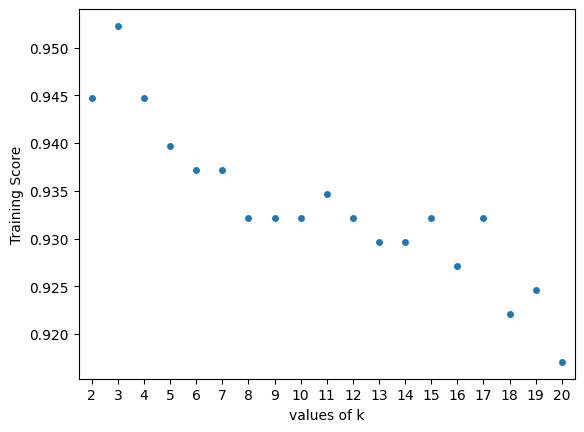

In [7]:
ax = sns.stripplot(x=K, y=training); 
ax.set(xlabel ='values of k', ylabel ='Training Score') 

plt.show() 
# function to show plot


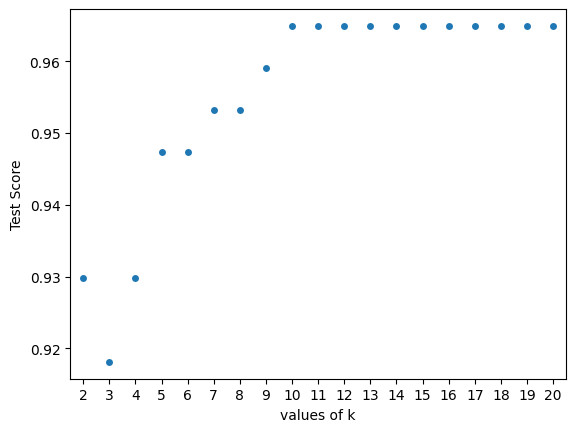

In [8]:
ax = sns.stripplot(x = K, y = test); 
ax.set(xlabel ='values of k', ylabel ='Test Score') 
plt.show() 


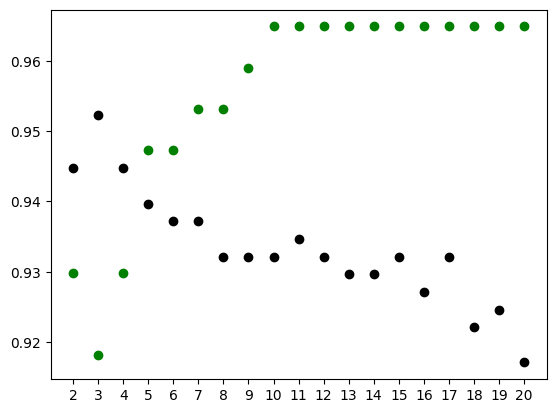

In [9]:
# For overlapping scatter plots 

plt.scatter(K, training, color ='k') 
plt.scatter(K, test, color ='g') 
plt.xticks(K)
plt.show() 

<b> From the plot it is clear that the optimum number of neighbours is 5. <b>

In [10]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train,y_train_pred)
train_acc

0.9396984924623115

In [12]:
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test,y_test_pred)
test_acc

0.9473684210526315

In [13]:
new_data = np.array(X.loc[500],ndmin=2)

new_pred = model.predict(new_data)
new_pred

array(['B'], dtype=object)